In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")


sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv('apartments_final.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   url            871 non-null    object 
 1   listing_id     871 non-null    object 
 2   zipcode        871 non-null    int64  
 3   monthly_rent   871 non-null    int64  
 4   bedrooms       871 non-null    int64  
 5   bathrooms      871 non-null    float64
 6   square_feet    871 non-null    int64  
 7   walk_score     871 non-null    int64  
 8   transit_score  871 non-null    int64  
 9   deposit        871 non-null    int64  
 10  latitude       871 non-null    float64
 11  longitude      871 non-null    float64
 12  neighborhood   871 non-null    object 
 13  nbhd           871 non-null    object 
dtypes: float64(3), int64(7), object(4)
memory usage: 95.4+ KB


In [4]:
df.head()

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,neighborhood,nbhd
0,https://www.apartments.com/2372-beckwith-dr-in...,ze0jqwy,46218,751,2,1.000,679,25,33,705,39.801,-86.126,Martindale-Brightwood,Martindale-Brightwood
1,https://www.apartments.com/7491-n-shadeland-av...,s34dq64,46250,1795,3,2.000,2500,54,33,1795,39.890,-86.045,I-69 Fall Creek,I-69 Fall Creek
2,https://www.apartments.com/nice-3-bedroom-ranc...,n669z9m,46237,1095,3,1.000,1439,29,32,1095,39.722,-86.121,University Heights,University Heights
3,https://www.apartments.com/1102-n-oakland-ave-...,c4kr5zf,46201,1300,3,1.500,1500,67,38,800,39.783,-86.113,Near Eastside,Near Eastside
4,https://www.apartments.com/634-e-10th-st-india...,rl2dfp0,46202,1600,2,2.000,1400,74,53,1600,39.781,-86.146,Chatham Arch,Chatham Arch


In [5]:
#import necessary libraries

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [6]:
#the function picks out the top 10% of neighborhoods listings
nbhd_counts=df['neighborhood'].value_counts()

top_10p=np.percentile(nbhd_counts, 90)

def nbhd_count(nbhd):
        if len(df[df.neighborhood == nbhd])>top_10p:
            return nbhd
        else:
            return 'Other'

In [7]:
#Apply the nbhd_count function to sort out the top 10% of popular neighborhoods in the nbhd column

df['nbhd']=df['nbhd'].apply(nbhd_count)

In [8]:
df.head()

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,neighborhood,nbhd
0,https://www.apartments.com/2372-beckwith-dr-in...,ze0jqwy,46218,751,2,1.000,679,25,33,705,39.801,-86.126,Martindale-Brightwood,Other
1,https://www.apartments.com/7491-n-shadeland-av...,s34dq64,46250,1795,3,2.000,2500,54,33,1795,39.890,-86.045,I-69 Fall Creek,Other
2,https://www.apartments.com/nice-3-bedroom-ranc...,n669z9m,46237,1095,3,1.000,1439,29,32,1095,39.722,-86.121,University Heights,Other
3,https://www.apartments.com/1102-n-oakland-ave-...,c4kr5zf,46201,1300,3,1.500,1500,67,38,800,39.783,-86.113,Near Eastside,Near Eastside
4,https://www.apartments.com/634-e-10th-st-india...,rl2dfp0,46202,1600,2,2.000,1400,74,53,1600,39.781,-86.146,Chatham Arch,Other


In [9]:
#Check how many unique entires on nbhd column after applying nbhd_count function

df.nbhd.unique()

array(['Other', 'Near Eastside', 'East Warren', 'Far Eastside',
       'Indianapolis', 'Snacks Guion Creek', 'South Perry', 'Augusta',
       'South Emerson', 'Eagle Creek'], dtype=object)

In [10]:
#Turn each unique entries into numerical values

df['nbhd'].replace({1: 'Near Eastside',
                      2: 'East Warren',
                      3: 'Far Eastside',
                      4: 'Indianapolis',
                      5: 'Snacks Guion Creek',
                      6: 'South Perry',
                      7: 'Augusta',
                      8: 'South Emerson',
                      9:  'Eagle Creek',
                      10: 'Other'}, inplace=True)

In [11]:
'''model doe snot accept any categorical column so nned to use one hot encoder. Here is using
dummy columns. After using dummy columns, create a new dataframe which only includes dummy columns
'''

df_dummy = pd.get_dummies(df['nbhd'])

In [12]:
df_dummy.head()

,Augusta,Eagle Creek,East Warren,Far Eastside,Indianapolis,Near Eastside,Other,Snacks Guion Creek,South Emerson,South Perry
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0


In [13]:
# Concenate dataframes df and df_dummy
df =  pd.concat([df,df_dummy], axis=1)

In [28]:
df.head()

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,...,Augusta,Eagle Creek,East Warren,Far Eastside,Indianapolis,Near Eastside,Other,Snacks Guion Creek,South Emerson,South Perry
0,https://www.apartments.com/2372-beckwith-dr-in...,ze0jqwy,46218,751,2,1.000,679,25,33,705,...,0,0,0,0,0,0,1,0,0,0
1,https://www.apartments.com/7491-n-shadeland-av...,s34dq64,46250,1795,3,2.000,2500,54,33,1795,...,0,0,0,0,0,0,1,0,0,0
2,https://www.apartments.com/nice-3-bedroom-ranc...,n669z9m,46237,1095,3,1.000,1439,29,32,1095,...,0,0,0,0,0,0,1,0,0,0
3,https://www.apartments.com/1102-n-oakland-ave-...,c4kr5zf,46201,1300,3,1.500,1500,67,38,800,...,0,0,0,0,0,1,0,0,0,0
4,https://www.apartments.com/634-e-10th-st-india...,rl2dfp0,46202,1600,2,2.000,1400,74,53,1600,...,0,0,0,0,0,0,1,0,0,0


In [14]:
#Our target feature is monthy rent and choose other columns that is affected the montly rent 

X=df[['zipcode', 'bedrooms', 'bathrooms',
       'square_feet','Augusta', 'Eagle Creek',
       'East Warren', 'Far Eastside', 'Indianapolis', 'Near Eastside', 'Other',
       'Snacks Guion Creek', 'South Emerson', 'South Perry']]
y=df[['monthly_rent']]
X

,zipcode,bedrooms,bathrooms,square_feet,Augusta,Eagle Creek,East Warren,Far Eastside,Indianapolis,Near Eastside,Other,Snacks Guion Creek,South Emerson,South Perry
0,46218,2,1.000,679,0,0,0,0,0,0,1,0,0,0
1,46250,3,2.000,2500,0,0,0,0,0,0,1,0,0,0
2,46237,3,1.000,1439,0,0,0,0,0,0,1,0,0,0
3,46201,3,1.500,1500,0,0,0,0,0,1,0,0,0,0
4,46202,2,2.000,1400,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,46227,3,1.500,1398,0,0,0,0,0,0,1,0,0,0
867,46250,3,2.500,1759,0,0,0,0,0,0,1,0,0,0
868,46220,2,2.000,1177,0,0,0,0,0,0,1,0,0,0
869,46240,2,2.000,1084,0,0,0,0,0,0,1,0,0,0


In [15]:
#Split into train and test set with 20% of test size

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

In [16]:

## Create an instance of Random Forest Regressor
#
forest = RandomForestRegressor(n_estimators=100,
                               max_depth=5,
                                 random_state=42)
#
# Fit the model
#
forest.fit(X_train, y_train)
 
#Predict the model

y_pred = forest.predict(X_test)

RandomForestRegressor(max_depth=5, random_state=42)

In [30]:


## Measure model performance

print('r2_score:',metrics.r2_score(y_test,y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r2_score: 0.6970780089155001
Mean Absolute Error: 205.7135954393298
Mean Squared Error: 67572.06268556521
Root Mean Squared Error: 259.9462688433231


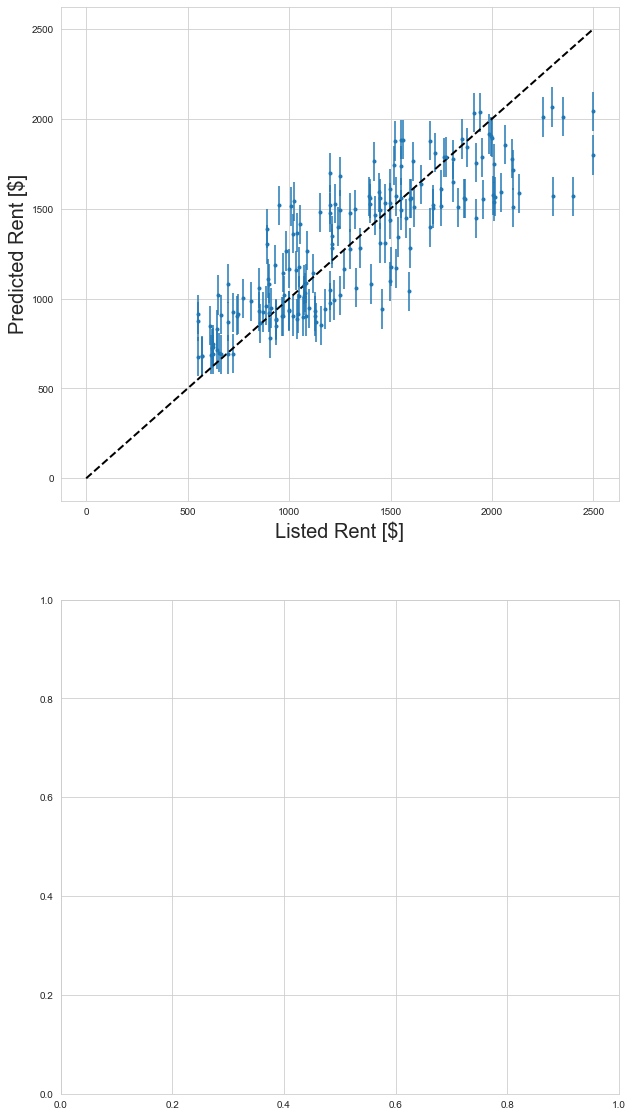

In [27]:
fig, axs = plt.subplots(2,1, figsize=(10,20))
plt.rc('axes', labelsize=20)
axs[0].errorbar(y_test, y_pred, yerr=109, linestyle="", marker=".")
axs[0].plot(range(2500), range(2500), linestyle="--", linewidth="2", color="k")
axs[0].set_xlabel("Listed Rent [$]");
axs[0].set_ylabel("Predicted Rent [$]");

# axs[1].scatter(y_test, (y_pred-y_test)*100/y_test);
# axs[1].set_xlabel("Listed Rent [$]");
# axs[1].set_ylabel("Percent Error [Model-Listing]")
# axs[1].axhline(0, c="k");